# **Import librares**

In [2]:
!pip install Keras-Preprocessing
import numpy as np
import pandas as pd
import nltk
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.corpus import reuters
from nltk.corpus import brown
from nltk.corpus import gutenberg
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle
import joblib
from collections import Counter
from textblob import Word
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras_preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense, Embedding, LSTM, SpatialDropout1D, Dropout, Flatten, GRU, Conv1D, MaxPooling1D, Bidirectional
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
from keras.regularizers import l2
!pip install ktrain
import ktrain
from ktrain import text
sns.set()
%matplotlib inline
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('gutenberg')
nltk.download('brown')
nltk.download("reuters")
nltk.download('words')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 50.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 73.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 56.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 89.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 87.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 51.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ...

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

# **Load Dataset**

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP/Suicide_Ideation_Dataset(Twitter-based).csv", engine='python', encoding='UTF-8')
df=df.replace('Potential Suicide post ','Potential Suicide post')
df['Suicide'].value_counts()
df

,Tweet,Suicide
0,making some lunch,Not Suicide post
1,@Alexia You want his money.,Not Suicide post
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post
...,...,...
1782,i have forgotten how much i love my Nokia N95-1,Not Suicide post
1783,Starting my day out with a positive attitude! ...,Not Suicide post
1784,"@belledame222 Hey, it's 5 am...give a girl som...",Not Suicide post
1785,2 drunken besties stumble into my room and we ...,Not Suicide post


# **Data Cleaning**

In [4]:
df['Tweet']=df['Tweet'].fillna("")
df.isna().sum()

Tweet      0
Suicide    0
dtype: int64

# **Preprocessing**

In [5]:
# Lower case conversion
df['lower_case']= df['Tweet'].apply(lambda x: x.lower())
df

,Tweet,Suicide,lower_case
0,making some lunch,Not Suicide post,making some lunch
1,@Alexia You want his money.,Not Suicide post,@alexia you want his money.
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post,@dizzyhrvy that crap took me forever to put to...
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post,@jnaylor #kiwitweets hey jer! since when did y...
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post,trying out &quot;delicious library 2&quot; wit...
...,...,...,...
1782,i have forgotten how much i love my Nokia N95-1,Not Suicide post,i have forgotten how much i love my nokia n95-1
1783,Starting my day out with a positive attitude! ...,Not Suicide post,starting my day out with a positive attitude! ...
1784,"@belledame222 Hey, it's 5 am...give a girl som...",Not Suicide post,"@belledame222 hey, it's 5 am...give a girl som..."
1785,2 drunken besties stumble into my room and we ...,Not Suicide post,2 drunken besties stumble into my room and we ...


In [6]:
# Tokenization process
tokenizer = RegexpTokenizer(r'\w+')
df['special_word'] = df.apply(lambda row: tokenizer.tokenize(row['lower_case']), axis=1)
df

,Tweet,Suicide,lower_case,special_word
0,making some lunch,Not Suicide post,making some lunch,"[making, some, lunch]"
1,@Alexia You want his money.,Not Suicide post,@alexia you want his money.,"[alexia, you, want, his, money]"
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post,@dizzyhrvy that crap took me forever to put to...,"[dizzyhrvy, that, crap, took, me, forever, to,..."
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post,@jnaylor #kiwitweets hey jer! since when did y...,"[jnaylor, kiwitweets, hey, jer, since, when, d..."
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post,trying out &quot;delicious library 2&quot; wit...,"[trying, out, quot, delicious, library, 2, quo..."
...,...,...,...,...
1782,i have forgotten how much i love my Nokia N95-1,Not Suicide post,i have forgotten how much i love my nokia n95-1,"[i, have, forgotten, how, much, i, love, my, n..."
1783,Starting my day out with a positive attitude! ...,Not Suicide post,starting my day out with a positive attitude! ...,"[starting, my, day, out, with, a, positive, at..."
1784,"@belledame222 Hey, it's 5 am...give a girl som...",Not Suicide post,"@belledame222 hey, it's 5 am...give a girl som...","[belledame222, hey, it, s, 5, am, give, a, gir..."
1785,2 drunken besties stumble into my room and we ...,Not Suicide post,2 drunken besties stumble into my room and we ...,"[2, drunken, besties, stumble, into, my, room,..."


In [7]:
# Stopwords Removal
stop = [word for word in stopwords.words('english') if word not in ["my","haven't","aren't","can","no", "why", "through", "herself", "she", "he", "himself", "you", "you're", "myself", "not", "here", "some", "do", "does", "did", "will", "don't", "doesn't", "didn't", "won't", "should", "should've", "couldn't", "mightn't", "mustn't", "shouldn't", "hadn't", "wasn't", "wouldn't"]]
df['stop_words'] = df['special_word'].apply(lambda x: [item for item in x if item not in stop])
df['stop_words'] = df['stop_words'].astype('str')
df

,Tweet,Suicide,lower_case,special_word,stop_words
0,making some lunch,Not Suicide post,making some lunch,"[making, some, lunch]","['making', 'some', 'lunch']"
1,@Alexia You want his money.,Not Suicide post,@alexia you want his money.,"[alexia, you, want, his, money]","['alexia', 'you', 'want', 'money']"
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post,@dizzyhrvy that crap took me forever to put to...,"[dizzyhrvy, that, crap, took, me, forever, to,...","['dizzyhrvy', 'crap', 'took', 'forever', 'put'..."
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post,@jnaylor #kiwitweets hey jer! since when did y...,"[jnaylor, kiwitweets, hey, jer, since, when, d...","['jnaylor', 'kiwitweets', 'hey', 'jer', 'since..."
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post,trying out &quot;delicious library 2&quot; wit...,"[trying, out, quot, delicious, library, 2, quo...","['trying', 'quot', 'delicious', 'library', '2'..."
...,...,...,...,...,...
1782,i have forgotten how much i love my Nokia N95-1,Not Suicide post,i have forgotten how much i love my nokia n95-1,"[i, have, forgotten, how, much, i, love, my, n...","['forgotten', 'much', 'love', 'my', 'nokia', '..."
1783,Starting my day out with a positive attitude! ...,Not Suicide post,starting my day out with a positive attitude! ...,"[starting, my, day, out, with, a, positive, at...","['starting', 'my', 'day', 'positive', 'attitud..."
1784,"@belledame222 Hey, it's 5 am...give a girl som...",Not Suicide post,"@belledame222 hey, it's 5 am...give a girl som...","[belledame222, hey, it, s, 5, am, give, a, gir...","['belledame222', 'hey', '5', 'give', 'girl', '..."
1785,2 drunken besties stumble into my room and we ...,Not Suicide post,2 drunken besties stumble into my room and we ...,"[2, drunken, besties, stumble, into, my, room,...","['2', 'drunken', 'besties', 'stumble', 'my', '..."


In [8]:
# Word filtering with word length of less or equal to 2
df['short_word'] = df['stop_words'].str.findall('\w{2,}')
df['string']=df['short_word'].str.join(' ')
df

,Tweet,Suicide,lower_case,special_word,stop_words,short_word,string
0,making some lunch,Not Suicide post,making some lunch,"[making, some, lunch]","['making', 'some', 'lunch']","[making, some, lunch]",making some lunch
1,@Alexia You want his money.,Not Suicide post,@alexia you want his money.,"[alexia, you, want, his, money]","['alexia', 'you', 'want', 'money']","[alexia, you, want, money]",alexia you want money
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post,@dizzyhrvy that crap took me forever to put to...,"[dizzyhrvy, that, crap, took, me, forever, to,...","['dizzyhrvy', 'crap', 'took', 'forever', 'put'...","[dizzyhrvy, crap, took, forever, put, together...",dizzyhrvy crap took forever put together iâ go...
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post,@jnaylor #kiwitweets hey jer! since when did y...,"[jnaylor, kiwitweets, hey, jer, since, when, d...","['jnaylor', 'kiwitweets', 'hey', 'jer', 'since...","[jnaylor, kiwitweets, hey, jer, since, did, yo...",jnaylor kiwitweets hey jer since did you start...
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post,trying out &quot;delicious library 2&quot; wit...,"[trying, out, quot, delicious, library, 2, quo...","['trying', 'quot', 'delicious', 'library', '2'...","[trying, quot, delicious, library, quot, mixed...",trying quot delicious library quot mixed resul...
...,...,...,...,...,...,...,...
1782,i have forgotten how much i love my Nokia N95-1,Not Suicide post,i have forgotten how much i love my nokia n95-1,"[i, have, forgotten, how, much, i, love, my, n...","['forgotten', 'much', 'love', 'my', 'nokia', '...","[forgotten, much, love, my, nokia, n95]",forgotten much love my nokia n95
1783,Starting my day out with a positive attitude! ...,Not Suicide post,starting my day out with a positive attitude! ...,"[starting, my, day, out, with, a, positive, at...","['starting', 'my', 'day', 'positive', 'attitud...","[starting, my, day, positive, attitude, great,...",starting my day positive attitude great watch ...
1784,"@belledame222 Hey, it's 5 am...give a girl som...",Not Suicide post,"@belledame222 hey, it's 5 am...give a girl som...","[belledame222, hey, it, s, 5, am, give, a, gir...","['belledame222', 'hey', '5', 'give', 'girl', '...","[belledame222, hey, give, girl, some, credit, ...",belledame222 hey give girl some credit trying
1785,2 drunken besties stumble into my room and we ...,Not Suicide post,2 drunken besties stumble into my room and we ...,"[2, drunken, besties, stumble, into, my, room,...","['2', 'drunken', 'besties', 'stumble', 'my', '...","[drunken, besties, stumble, my, room, run, aro...",drunken besties stumble my room run around sob...


In [9]:
# Non-english words (mention,emoji,link,special characters etc..) removal
words = set(nltk.corpus.words.words())
for w in reuters.words():
  words.add(w)
for w in brown.words():
  words.add(w)
for w in gutenberg.words():
  words.add(w)
df['nonEnglish'] = df['string'].apply(lambda x: " ".join(x for x in x.split() if x in words))
df

,Tweet,Suicide,lower_case,special_word,stop_words,short_word,string,nonEnglish
0,making some lunch,Not Suicide post,making some lunch,"[making, some, lunch]","['making', 'some', 'lunch']","[making, some, lunch]",making some lunch,making some lunch
1,@Alexia You want his money.,Not Suicide post,@alexia you want his money.,"[alexia, you, want, his, money]","['alexia', 'you', 'want', 'money']","[alexia, you, want, money]",alexia you want money,alexia you want money
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post,@dizzyhrvy that crap took me forever to put to...,"[dizzyhrvy, that, crap, took, me, forever, to,...","['dizzyhrvy', 'crap', 'took', 'forever', 'put'...","[dizzyhrvy, crap, took, forever, put, together...",dizzyhrvy crap took forever put together iâ go...,crap took forever put together going go sleep ...
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post,@jnaylor #kiwitweets hey jer! since when did y...,"[jnaylor, kiwitweets, hey, jer, since, when, d...","['jnaylor', 'kiwitweets', 'hey', 'jer', 'since...","[jnaylor, kiwitweets, hey, jer, since, did, yo...",jnaylor kiwitweets hey jer since did you start...,hey since did you start twittering
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post,trying out &quot;delicious library 2&quot; wit...,"[trying, out, quot, delicious, library, 2, quo...","['trying', 'quot', 'delicious', 'library', '2'...","[trying, quot, delicious, library, quot, mixed...",trying quot delicious library quot mixed resul...,trying quot delicious library quot mixed resul...
...,...,...,...,...,...,...,...,...
1782,i have forgotten how much i love my Nokia N95-1,Not Suicide post,i have forgotten how much i love my nokia n95-1,"[i, have, forgotten, how, much, i, love, my, n...","['forgotten', 'much', 'love', 'my', 'nokia', '...","[forgotten, much, love, my, nokia, n95]",forgotten much love my nokia n95,forgotten much love my
1783,Starting my day out with a positive attitude! ...,Not Suicide post,starting my day out with a positive attitude! ...,"[starting, my, day, out, with, a, positive, at...","['starting', 'my', 'day', 'positive', 'attitud...","[starting, my, day, positive, attitude, great,...",starting my day positive attitude great watch ...,starting my day positive attitude great watch ...
1784,"@belledame222 Hey, it's 5 am...give a girl som...",Not Suicide post,"@belledame222 hey, it's 5 am...give a girl som...","[belledame222, hey, it, s, 5, am, give, a, gir...","['belledame222', 'hey', '5', 'give', 'girl', '...","[belledame222, hey, give, girl, some, credit, ...",belledame222 hey give girl some credit trying,hey give girl some credit trying
1785,2 drunken besties stumble into my room and we ...,Not Suicide post,2 drunken besties stumble into my room and we ...,"[2, drunken, besties, stumble, into, my, room,...","['2', 'drunken', 'besties', 'stumble', 'my', '...","[drunken, besties, stumble, my, room, run, aro...",drunken besties stumble my room run around sob...,drunken stumble my room run around sober drunk...


In [10]:
#Lemmatization
df['new_tweets'] = df['nonEnglish'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df

,Tweet,Suicide,lower_case,special_word,stop_words,short_word,string,nonEnglish,new_tweets
0,making some lunch,Not Suicide post,making some lunch,"[making, some, lunch]","['making', 'some', 'lunch']","[making, some, lunch]",making some lunch,making some lunch,making some lunch
1,@Alexia You want his money.,Not Suicide post,@alexia you want his money.,"[alexia, you, want, his, money]","['alexia', 'you', 'want', 'money']","[alexia, you, want, money]",alexia you want money,alexia you want money,alexia you want money
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post,@dizzyhrvy that crap took me forever to put to...,"[dizzyhrvy, that, crap, took, me, forever, to,...","['dizzyhrvy', 'crap', 'took', 'forever', 'put'...","[dizzyhrvy, crap, took, forever, put, together...",dizzyhrvy crap took forever put together iâ go...,crap took forever put together going go sleep ...,crap took forever put together going go sleep day
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post,@jnaylor #kiwitweets hey jer! since when did y...,"[jnaylor, kiwitweets, hey, jer, since, when, d...","['jnaylor', 'kiwitweets', 'hey', 'jer', 'since...","[jnaylor, kiwitweets, hey, jer, since, did, yo...",jnaylor kiwitweets hey jer since did you start...,hey since did you start twittering,hey since did you start twittering
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post,trying out &quot;delicious library 2&quot; wit...,"[trying, out, quot, delicious, library, 2, quo...","['trying', 'quot', 'delicious', 'library', '2'...","[trying, quot, delicious, library, quot, mixed...",trying quot delicious library quot mixed resul...,trying quot delicious library quot mixed resul...,trying quot delicious library quot mixed resul...
...,...,...,...,...,...,...,...,...,...
1782,i have forgotten how much i love my Nokia N95-1,Not Suicide post,i have forgotten how much i love my nokia n95-1,"[i, have, forgotten, how, much, i, love, my, n...","['forgotten', 'much', 'love', 'my', 'nokia', '...","[forgotten, much, love, my, nokia, n95]",forgotten much love my nokia n95,forgotten much love my,forgotten much love my
1783,Starting my day out with a positive attitude! ...,Not Suicide post,starting my day out with a positive attitude! ...,"[starting, my, day, out, with, a, positive, at...","['starting', 'my', 'day', 'positive', 'attitud...","[starting, my, day, positive, attitude, great,...",starting my day positive attitude great watch ...,starting my day positive attitude great watch ...,starting my day positive attitude great watch ...
1784,"@belledame222 Hey, it's 5 am...give a girl som...",Not Suicide post,"@belledame222 hey, it's 5 am...give a girl som...","[belledame222, hey, it, s, 5, am, give, a, gir...","['belledame222', 'hey', '5', 'give', 'girl', '...","[belledame222, hey, give, girl, some, credit, ...",belledame222 hey give girl some credit trying,hey give girl some credit trying,hey give girl some credit trying
1785,2 drunken besties stumble into my room and we ...,Not Suicide post,2 drunken besties stumble into my room and we ...,"[2, drunken, besties, stumble, into, my, room,...","['2', 'drunken', 'besties', 'stumble', 'my', '...","[drunken, besties, stumble, my, room, run, aro...",drunken besties stumble my room run around sob...,drunken stumble my room run around sober drunk...,drunken stumble my room run around sober drunk...


## Visualization

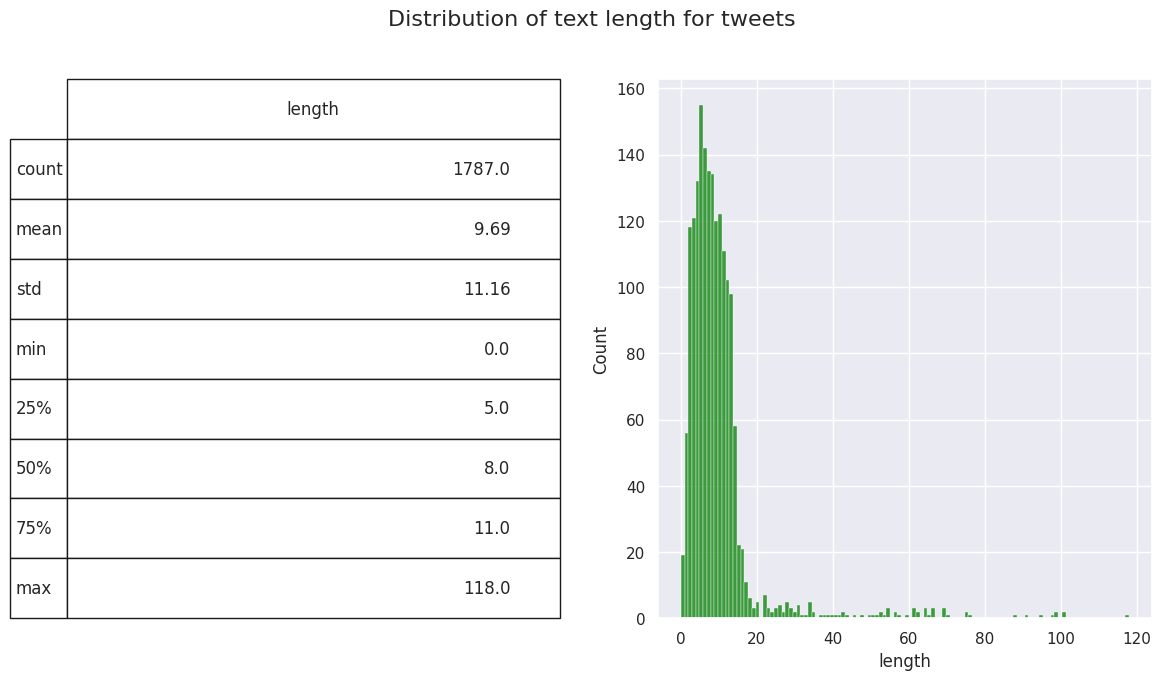

In [11]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.new_tweets.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df['length'], ax=ax1,color='green')
describe = df.length.describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 12
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for tweets', fontsize=16)

plt.show()

<Axes: xlabel='Suicide', ylabel='count'>

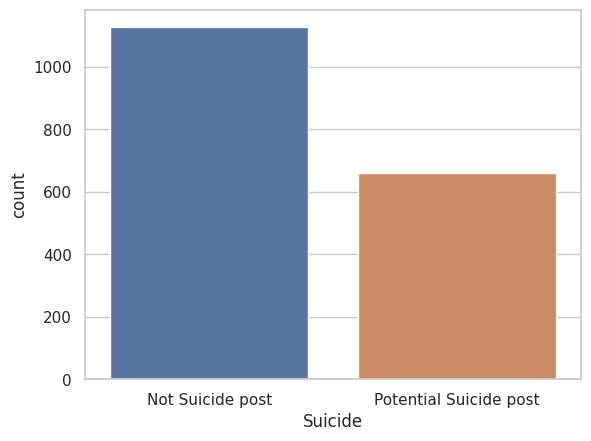

In [12]:
sns.set_theme(style="whitegrid")
sns.countplot(x=df["Suicide"])

In [13]:
top = Counter([item for sublist in df['short_word'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
fig = px.bar(temp, x="count", y="Common_words", title='Commmon words in selected text', orientation='h', width=700, height=700,color='Common_words')
fig.show()

In [15]:
Positive = df[df['Suicide']=='Not Suicide post']
Suicidal = df[df['Suicide']=='Potential Suicide post']

In [16]:
top = Counter([item for sublist in Positive['short_word'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most commmon words in positive posts', orientation='h', width=700, height=700,color='Common_words')
fig.show()

In [17]:
top = Counter([item for sublist in Suicidal['short_word'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative.columns = ['Common_words','count']
fig = px.bar(temp_negative, x="count", y="Common_words", title='Most commmon words in suicidal posts', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

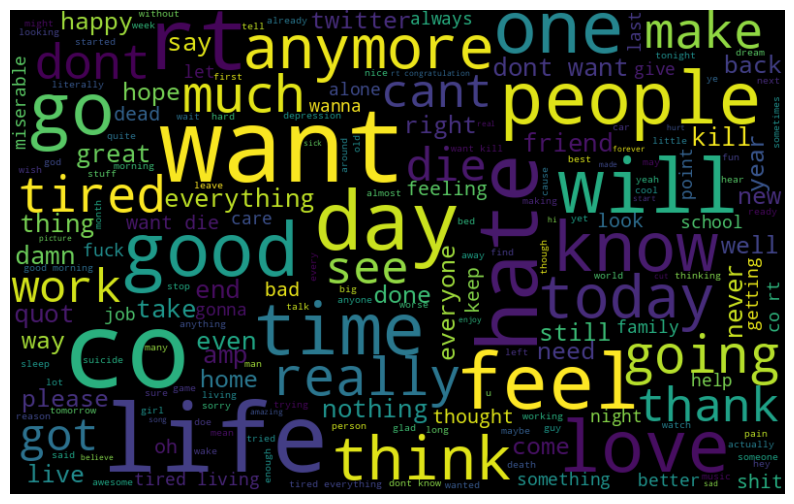

In [17]:
normal_words =' '.join([text for text in df['new_tweets']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

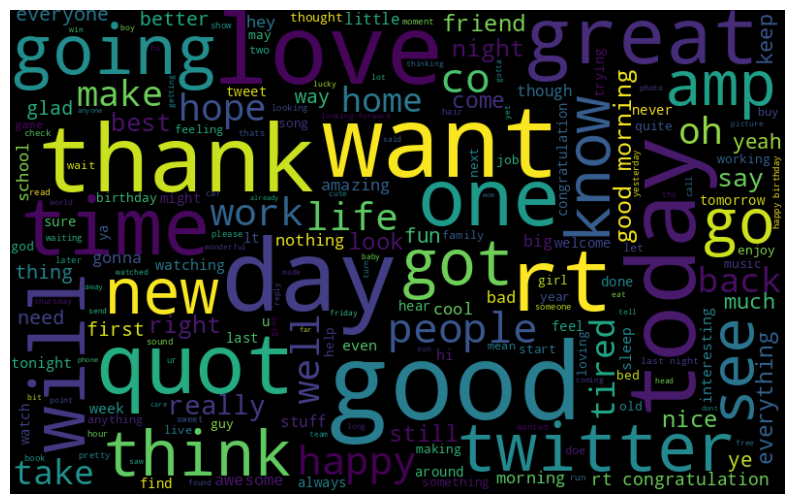

In [18]:
positive_words =' '.join([text for text in df['new_tweets'][df['Suicide'] == 'Not Suicide post']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

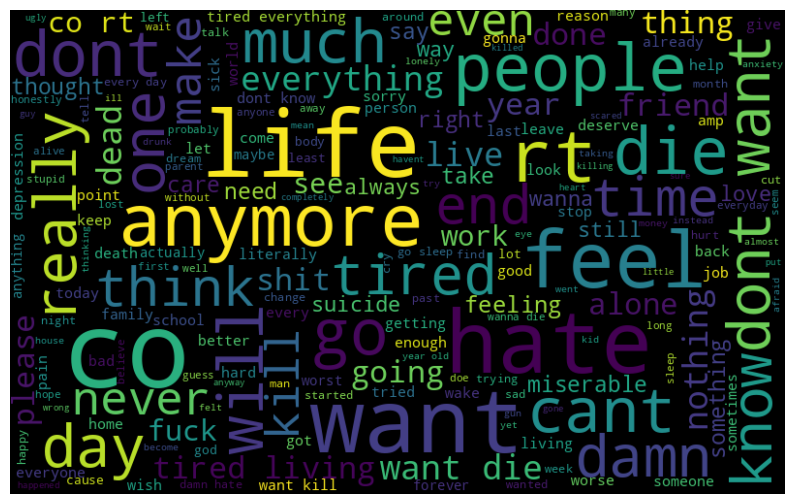

In [19]:
negative_words =' '.join([text for text in df['new_tweets'][df['Suicide'] == 'Potential Suicide post']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## **Applying N-gram**

In [20]:
x_train, x_test, y_train, y_test = train_test_split(df["new_tweets"],df["Suicide"], test_size = 0.25, random_state = 42)
count_vect = CountVectorizer(ngram_range=(1, 2))
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print (x_train_tfidf.shape,x_test_tfidf.shape, y_train.shape, y_test.shape)

(1340, 12432) (447, 12432) (1340,) (447,)


# **Machine Learning Models**

# **Logistic Regression**

In [21]:
lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
lr.fit(x_train_tfidf, y_train)
y_pred1 = lr.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred1)))
print(classification_report(y_test, y_pred1))

Accuracy: 0.9261744966442953
                        precision    recall  f1-score   support

      Not Suicide post       0.92      0.96      0.94       276
Potential Suicide post       0.93      0.87      0.90       171

              accuracy                           0.93       447
             macro avg       0.93      0.92      0.92       447
          weighted avg       0.93      0.93      0.93       447



In [22]:
scores = cross_val_score(lr, x_train_tfidf,y_train, cv=10)
print(accuracy_score(y_test,y_pred1))
print ("Cross-validated scores:", scores)

0.9261744966442953
Cross-validated scores: [0.91791045 0.87313433 0.87313433 0.81343284 0.90298507 0.90298507
 0.91044776 0.86567164 0.87313433 0.85820896]


# **Support Vector Machine**

In [23]:
svc = LinearSVC()
svc.fit(x_train_tfidf, y_train)
y_pred2 = svc.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred2)))
print(classification_report(y_test, y_pred2))

Accuracy: 0.9328859060402684
                        precision    recall  f1-score   support

      Not Suicide post       0.96      0.93      0.94       276
Potential Suicide post       0.89      0.94      0.91       171

              accuracy                           0.93       447
             macro avg       0.93      0.93      0.93       447
          weighted avg       0.93      0.93      0.93       447



In [24]:
scores = cross_val_score(svc, x_train_tfidf,y_train, cv=10)
print(accuracy_score(y_test,y_pred2))
print ("Cross-validated scores:", scores)

0.9328859060402684
Cross-validated scores: [0.93283582 0.90298507 0.89552239 0.86567164 0.93283582 0.91791045
 0.95522388 0.91791045 0.91791045 0.8880597 ]




## **Naive Bayes(Multinomial)**

In [25]:
mnb = MultinomialNB()
mnb.fit(x_train_tfidf, y_train)
y_pred3 = mnb.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred3)))
print(classification_report(y_test, y_pred3))

Accuracy: 0.8859060402684564
                        precision    recall  f1-score   support

      Not Suicide post       0.85      0.98      0.91       276
Potential Suicide post       0.96      0.73      0.83       171

              accuracy                           0.89       447
             macro avg       0.91      0.86      0.87       447
          weighted avg       0.90      0.89      0.88       447



In [26]:
scores = cross_val_score(mnb, x_train_tfidf,y_train, cv=10)
print(accuracy_score(y_test,y_pred3))
print ("Cross-validated scores:", scores)

0.8859060402684564
Cross-validated scores: [0.94776119 0.89552239 0.89552239 0.80597015 0.91791045 0.91044776
 0.91791045 0.85820896 0.86567164 0.85074627]


## **Randomforest**


In [27]:
rfc = RandomForestClassifier(n_estimators=300, max_depth=15, random_state=42, class_weight='balanced')
rfc.fit(x_train_tfidf,y_train)
y_pred4 = rfc.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred4)))
print(classification_report(y_test, y_pred4))

Accuracy: 0.8903803131991052
                        precision    recall  f1-score   support

      Not Suicide post       0.86      0.99      0.92       276
Potential Suicide post       0.97      0.74      0.84       171

              accuracy                           0.89       447
             macro avg       0.91      0.86      0.88       447
          weighted avg       0.90      0.89      0.89       447



In [28]:
scores = cross_val_score(rfc, x_train_tfidf,y_train, cv=10)
print(accuracy_score(y_test,y_pred4))
print ("Cross-validated scores:", scores)

0.8903803131991052
Cross-validated scores: [0.95522388 0.91791045 0.89552239 0.87313433 0.94029851 0.89552239
 0.92537313 0.90298507 0.89552239 0.91791045]


# **GradientBoostingClassifier**

In [29]:
gbc = GradientBoostingClassifier(n_estimators=1000, max_features='auto', max_depth=4, random_state=1, verbose=1)
gbc.fit(x_train_tfidf, y_train)
y_pred5 = gbc.predict(x_test_tfidf)
print(accuracy_score(y_test, y_pred5))
print(classification_report(y_test, y_pred5))

      Iter       Train Loss   Remaining Time 
         1           1.2109           46.58s
         2           1.1315           41.47s
         3           1.0652           39.70s
         4           1.0038           38.46s
         5           0.9550           38.86s
         6           0.9126           39.02s
         7           0.8729           38.56s
         8           0.8396           38.08s
         9           0.8085           37.78s
        10           0.7807           37.87s
        20           0.5898           36.11s
        30           0.4944           35.13s
        40           0.4295           34.18s
        50           0.3860           31.71s
        60           0.3492           29.15s
        70           0.3204           27.42s
        80           0.2966           26.14s
        90           0.2790           24.94s
       100           0.2627           23.93s
       200           0.1594           18.24s
       300           0.1066           14.96s
       40

In [30]:
scores = cross_val_score(gbc, x_train_tfidf,y_train, cv=10)
print(accuracy_score(y_test,y_pred5))
print ("Cross-validated scores:", scores)

      Iter       Train Loss   Remaining Time 
         1           1.2117           42.35s
         2           1.1320           41.13s
         3           1.0644           40.41s
         4           1.0086           41.01s
         5           0.9596           41.01s
         6           0.9169           40.92s
         7           0.8780           42.11s
         8           0.8449           41.63s
         9           0.8132           41.79s
        10           0.7824           41.78s
        20           0.6023           40.01s
        30           0.5062           39.05s
        40           0.4444           38.51s
        50           0.3955           37.94s
        60           0.3575           37.16s
        70           0.3291           36.52s
        80           0.3074           35.97s
        90           0.2872           35.33s
       100           0.2695           34.81s
       200           0.1601           32.58s
       300           0.1058           32.56s
       40

## **Ensemble Classifier**

In [31]:
mnb = MultinomialNB()
rfc= RandomForestClassifier(n_estimators=1000, max_depth=12, random_state=42)
lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
svc = SVC(probability=True)
ec=VotingClassifier(estimators=[('Multinominal NB', mnb), ('Random Forest', rfc),('Logistic Regression',lr),('Support Vector Machine',svc)], voting='soft', weights=[1,2,3,4])
ec.fit(x_train_tfidf,y_train)
y_pred6 = ec.predict(x_test_tfidf)
print(accuracy_score(y_test, y_pred6))
print(classification_report(y_test, y_pred6))

0.9351230425055929
                        precision    recall  f1-score   support

      Not Suicide post       0.97      0.92      0.95       276
Potential Suicide post       0.89      0.95      0.92       171

              accuracy                           0.94       447
             macro avg       0.93      0.94      0.93       447
          weighted avg       0.94      0.94      0.94       447



In [32]:
scores = cross_val_score(ec, x_train_tfidf,y_train, cv=10)
print(accuracy_score(y_test,y_pred6))
print ("Cross-validated scores:", scores)

0.9351230425055929
Cross-validated scores: [0.95522388 0.93283582 0.90298507 0.88059701 0.93283582 0.94776119
 0.97014925 0.91044776 0.91791045 0.90298507]


In [33]:
mc = count_vect.transform(["I just want to jump of the roof."])
m = transformer.transform(mc)
y_pred = ec.predict(m)
print(y_pred)

['Not Suicide post']


In [34]:
mc = count_vect.transform(["I just want to jump of the roof and die."])
m = transformer.transform(mc)
y_pred = ec.predict(m)
print(y_pred)

['Potential Suicide post']


In these two examples, both of the sentences can be labeled as "Potential Suicide Post", but the model couldn't detect the 1st example because of the word limits in the training datasets, so the model couldn't find any similar negative word in it and thus detected it wrong.

## **AdaBoost with Random Forest Classifier**

In [35]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=9, random_state=0)
abc= AdaBoostClassifier(base_estimator=rfc, learning_rate=0.2, n_estimators=100)
abc.fit(x_train_tfidf, y_train)
y_pred7= abc.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test, y_pred7)))
print(classification_report(y_test, y_pred7))

Accuracy: 0.9261744966442953
                        precision    recall  f1-score   support

      Not Suicide post       0.90      0.99      0.94       276
Potential Suicide post       0.98      0.82      0.90       171

              accuracy                           0.93       447
             macro avg       0.94      0.91      0.92       447
          weighted avg       0.93      0.93      0.92       447



In [36]:
scores = cross_val_score(abc, x_train_tfidf,y_train, cv=10)
print(accuracy_score(y_test,y_pred7))
print ("Cross-validated scores:", scores)

0.9261744966442953
Cross-validated scores: [0.97014925 0.93283582 0.94029851 0.87313433 0.93283582 0.93283582
 0.94029851 0.91044776 0.91791045 0.94029851]


# **Comparison Between ML Models**

In [37]:
Comparison = pd.DataFrame({'Logistic Regression': [accuracy_score(y_test,y_pred1)*100,f1_score(y_test,y_pred1,average='macro')*100,recall_score(y_test, y_pred1,average='micro')*100,precision_score(y_test, y_pred1,average='micro')*100],
                            'SVM':[accuracy_score(y_test,y_pred2)*100,f1_score(y_test,y_pred2,average='macro')*100,recall_score(y_test, y_pred2,average='micro')*100,precision_score(y_test, y_pred2,average='micro')*100],
                           'Naive Bayes':[accuracy_score(y_test,y_pred3)*100,f1_score(y_test,y_pred3,average='macro')*100,recall_score(y_test, y_pred3,average='micro')*100,precision_score(y_test, y_pred3,average='micro')*100],
                           'Random Forest':[accuracy_score(y_test,y_pred4)*100,f1_score(y_test,y_pred4,average='macro')*100,recall_score(y_test, y_pred4,average='micro')*100,precision_score(y_test, y_pred4,average='micro')*100],
                           'GradientBoosting':[accuracy_score(y_test,y_pred5)*100,f1_score(y_test,y_pred5,average='macro')*100,recall_score(y_test, y_pred5,average='micro')*100,precision_score(y_test, y_pred5,average='micro')*100],
                           'Ensembled':[accuracy_score(y_test,y_pred6)*100,f1_score(y_test,y_pred6,average='macro')*100,recall_score(y_test, y_pred6,average='micro')*100,precision_score(y_test, y_pred6,average='micro')*100],
                           'Adaboost':[accuracy_score(y_test,y_pred7)*100,f1_score(y_test,y_pred7,average='macro')*100,recall_score(y_test, y_pred7,average='micro')*100,precision_score(y_test, y_pred7,average='micro')*100],

})

In [38]:
print ('Comparison using uni-gram(1,1)')
Comparison.rename(index={0:'Accuracy',1:'F1_score', 2: 'Recall',3:'Precision'}, inplace=True)
Comparison.head()

Comparison using uni-gram(1,1)


,Logistic Regression,SVM,Naive Bayes,Random Forest,GradientBoosting,Ensembled,Adaboost
Accuracy,92.617450,93.288591,88.590604,89.038031,93.512304,93.512304,92.617450
F1_score,92.084377,92.971109,87.228071,87.728931,93.077724,93.225326,91.912164
Recall,92.617450,93.288591,88.590604,89.038031,93.512304,93.512304,92.617450
Precision,92.617450,93.288591,88.590604,89.038031,93.512304,93.512304,92.617450


In [39]:
print ('Comparison using bi-gram(2,2)')
Comparison.rename(index={0:'Accuracy',1:'F1_score', 2: 'Recall',3:'Precision'}, inplace=True)
Comparison.head()

Comparison using bi-gram(2,2)


,Logistic Regression,SVM,Naive Bayes,Random Forest,GradientBoosting,Ensembled,Adaboost
Accuracy,92.617450,93.288591,88.590604,89.038031,93.512304,93.512304,92.617450
F1_score,92.084377,92.971109,87.228071,87.728931,93.077724,93.225326,91.912164
Recall,92.617450,93.288591,88.590604,89.038031,93.512304,93.512304,92.617450
Precision,92.617450,93.288591,88.590604,89.038031,93.512304,93.512304,92.617450


In [40]:
print ('Comparison using uni-bi-gram(1,2)')
Comparison.rename(index={0:'Accuracy',1:'F1_score', 2: 'Recall',3:'Precision'}, inplace=True)
Comparison.head()

Comparison using uni-bi-gram(1,2)


,Logistic Regression,SVM,Naive Bayes,Random Forest,GradientBoosting,Ensembled,Adaboost
Accuracy,92.617450,93.288591,88.590604,89.038031,93.512304,93.512304,92.617450
F1_score,92.084377,92.971109,87.228071,87.728931,93.077724,93.225326,91.912164
Recall,92.617450,93.288591,88.590604,89.038031,93.512304,93.512304,92.617450
Precision,92.617450,93.288591,88.590604,89.038031,93.512304,93.512304,92.617450
